# **Лабораторная работа №8** "Построение пайплайна одномерной регрессии"
# **Выполнил: Дякин Владимир; группа: ПИН-б-о-22-1**

## Ссылка на используемый датасет: https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset

## **Первичный анализ**

### Общее описание набора данных "Advertising Sales Dataset"

Этот набор данных содержит информацию о продажах рекламы в различных источниках. Он включает 200 экземпляров с 4 признаками, все из которых являются численными.

### Описание признаков

1. **TV** - бюджет рекламы на телевидении, в тыс. долл.
2. **Radio** - бюджет рекламы на радио, в тыс. долл.  
3. **Newspaper** - бюджет рекламы в газетах, в тыс. долл.
4. **Sales** - объем продаж, в тыс. долл.

### Характеристики данных

- Количество элементов (Instances): 200
- Количество признаков (Features): 4
- Связанные задачи: Регрессия
- Характеристики набора данных: Многомерные (Multivariate)
- Тип признаков: Численные (Numeric)

### Распределение данных

Поскольку данный набор данных предназначен для задачи регрессии, в нем нет информации о распределении классов. Вместо этого нужно провести анализ статистических характеристик числовых признаков, таких как:

- Среднее значение
- Медиана
- Стандартное отклонение
- Минимальное и максимальное значения
- Гистограммы распределения

Это поможет понять характер и особенности данных, что в свою очередь позволит выбрать подходящие методы моделирования.

Таким образом, данный набор данных "Advertising Sales Dataset" представляет интерес для разработки и оценки моделей регрессии, прогнозирующих объем продаж на основе бюджетов рекламы в различных источниках.

## Задание

Импорт необходимых библиотек для работы с данными (Pandas, NumPy), визуализацией (Matplotlib).

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Чтение данных из файла "advertising_sales.csv" в Pandas DataFrame dataset и вывод первых 5 строк данных.

In [11]:
dataset = pd.read_csv('advertising_sales.csv')
dataset.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Разделение данных из DataFrame на матрицу признаков X и зависимую переменную y, с выводом их на экран.

In [12]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 4].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]]
Зависимая переменная
[22.1 10.4  9.3 18.5 12.9]


Разделение выборки на тренировочную и тестовую части

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

Инициализация и обучение линейной регрессионной модели на наборе данных `X_train` и `y_train`.

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Предсказание целевых значений на тестовых данных с помощью обученной линейной регрессионной модели и вывод результата.

In [15]:
y_pred = regressor.predict(X_test)
print(y_pred)

[10.44203308  9.55607966 11.42027332 20.61665445 15.10251725  9.84216879
  7.65035693 18.32794143  8.34712238 16.36684661 19.30618167 11.27261442
 14.4749669  15.91464122 10.77426562 12.79534687 19.50459832  7.28120967
 10.69582183 17.09591245 20.51975329 13.72282936 15.32861994 13.32599606
  9.71758159 12.92916275 14.89025757 16.70830783 17.58503257  8.40710881
 10.37743231 16.42683304 20.20136378 18.40177088  7.85800226  8.111791
  9.99905637 15.59163737 10.40511836  8.40249447  8.95160102  8.70242662
 13.84280222 16.9205675  17.18819927 11.98783724  7.64574259  8.02873287
 13.04913561 12.07550971]


Построение графика зависимости веса от роста. Точечный красный график обучающих данных, а также синий график линии регрессии, полученной на основе обученной модели

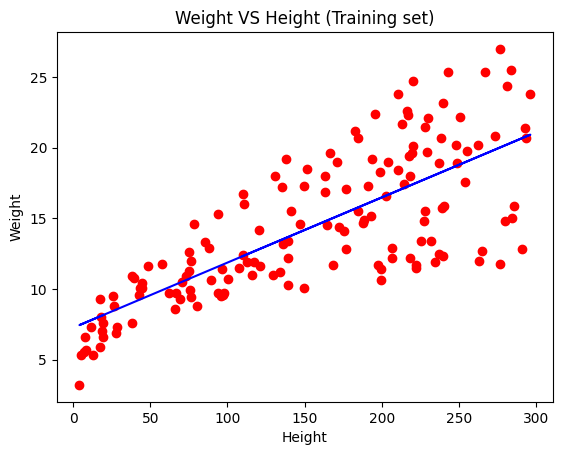

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Weight VS Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Такой же график, но на тестовом датасете

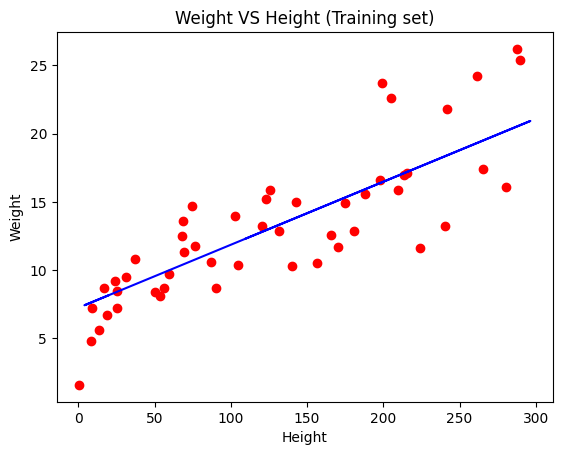

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Weight VS Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Контрольные вопросы

### **1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?**

При реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков, потому что коэффициенты модели линейной регрессии изменяются пропорционально масштабу признаков, их абсолютные значения не влияют на результат.

### **2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?**

При реализации модели линейной регрессии используется квадратичное отклонение в качестве функции потерь, так как оно обладает хорошими математическими свойствами, такими как дифференцируемость и выпуклость, что упрощает процесс оптимизации.

### **3. Что именно реализовано в методе fit(X, y) класса LinearRegression?**

Метод fit(X, y) класса LinearRegression реализует процесс обучения модели линейной регрессии, где X - матрица признаков, y - вектор целевых значений. Метод подбирает оптимальные коэффициенты модели, минимизируя функцию потерь.

### **4. Что такое р-значение? Как р-значение используется при оптимизации моделей регрессии?**

Р-значение (p-value) - это вероятность получить такие или более экстремальные результаты, если нулевая гипотеза верна. В контексте оптимизации моделей регрессии, р-значение используется для оценки статистической значимости коэффициентов модели и их влияния на целевую переменную.

### **5. Поясните назначение метода predict класса LinearRegression.**

Метод predict класса LinearRegression используется для предсказания целевых значений на основе входных признаков. После обучения модели с помощью метода fit, метод predict позволяет получить прогнозы для новых данных.

### **6. Поясните назначение метода plot и scatter класса pyplot.**

Метод plot класса pyplot используется для создания графиков, визуализации данных и результатов моделирования. Метод scatter используется для построения точечной диаграммы, где каждая точка представляет пару значений.

### **7. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?**

Точность модели машинного обучения необходимо оценивать на тестовой подвыборке, чтобы оценить ее способность обобщения на новые данные. Оценка на тренировочной выборке может привести к переобучению и недооценке реальной производительности модели.

## Вывод

Разработан единый пайплайн для решения задачи регрессии.Реализован конвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии. Изучены теоретические основы задачи регрессии. Получены навыки использования пайплайна при решении задач машинного обучения. Получены навыки рефакторинга кода в задачах машинного обучения.